In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations, cramers_v, correlation_ratio, theils_u
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_columns', None)

import joblib

In [3]:
df = pd.read_excel('CreditCard.xls')

In [4]:
df

Unnamed: 0         X1   X2         X3        X4   X5     X6     X7  \
0             ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2   
1              1      20000    2          2         1   24      2      2   
2              2     120000    2          2         2   26     -1      2   
3              3      90000    2          2         2   34      0      0   
4              4      50000    2          2         1   37      0      0   
...          ...        ...  ...        ...       ...  ...    ...    ...   
29996      29996     220000    1          3         1   39      0      0   
29997      29997     150000    1          3         2   43     -1     -1   
29998      29998      30000    1          2         2   37      4      3   
29999      29999      80000    1          3         1   41      1     -1   
30000      30000      50000    1          2         1   46      0      0   

          X8     X9    X10    X11        X12        X13        X14        X15  \
0      PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4   
1         -1     -1     -2     -2       3913       3102        689          0   
2          0      0      0      2       2682       1725       2682       3272   
3          0      0      0      0      29239      14027      13559      14331   
4          0      0      0      0      46990      48233      49291      28314   
...      ...    ...    ...    ...        ...        ...        ...        ...   
29996      0      0      0      0     188948     192815     208365      88004   
29997     -1     -1      0      0       1683       1828       3502       8979   
29998      2     -1      0      0       3565       3356       2758      20878   
29999      0      0      0     -1      -1645      78379      76304      52774   
30000      0      0      0      0      47929      48905      49764      36535   

             X16        X17       X18       X19       X20       X21       X22  \
0      BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5   
1              0          0         0       689         0         0         0   
2           3455       3261         0      1000      1000      1000         0   
3          14948      15549      1518      1500      1000      1000      1000   
4          28959      29547      2000      2019      1200      1100      1069   
...          ...        ...       ...       ...       ...       ...       ...   
29996      31237      15980      8500     20000      5003      3047      5000   
29997       5190          0      1837      3526      8998       129         0   
29998      20582      19357         0         0     22000      4200      2000   
29999      11855      48944     85900      3409      1178      1926     52964   
30000      32428      15313      2078      1800      1430      1000      1000   

            X23                           Y  
0      PAY_AMT6  default payment next month  
1             0                           1  
2          2000                           1  
3          5000                           0  
4          1000                           0  
...         ...                         ...  
29996      1000                           0  
29997         0                           0  
29998      3100                           1  
29999      1804                           1  
30000      1000                           1  

[30001 rows x 25 columns]

In [5]:
a = df.iloc[0]
df = df[1:]
df.columns=a

In [6]:
df.set_index('ID', inplace=True)

In [7]:
df

0     LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5  \
ID                                                                         
1         20000   2         2        1  24     2     2    -1    -1    -2   
2        120000   2         2        2  26    -1     2     0     0     0   
3         90000   2         2        2  34     0     0     0     0     0   
4         50000   2         2        1  37     0     0     0     0     0   
5         50000   1         2        1  57    -1     0    -1     0     0   
...         ...  ..       ...      ...  ..   ...   ...   ...   ...   ...   
29996    220000   1         3        1  39     0     0     0     0     0   
29997    150000   1         3        2  43    -1    -1    -1    -1     0   
29998     30000   1         2        2  37     4     3     2    -1     0   
29999     80000   1         3        1  41     1    -1     0     0     0   
30000     50000   1         2        1  46     0     0     0     0     0   

0     PAY_6 BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6  \
ID                                                                        
1        -2      3913      3102       689         0         0         0   
2         2      2682      1725      2682      3272      3455      3261   
3         0     29239     14027     13559     14331     14948     15549   
4         0     46990     48233     49291     28314     28959     29547   
5         0      8617      5670     35835     20940     19146     19131   
...     ...       ...       ...       ...       ...       ...       ...   
29996     0    188948    192815    208365     88004     31237     15980   
29997     0      1683      1828      3502      8979      5190         0   
29998     0      3565      3356      2758     20878     20582     19357   
29999    -1     -1645     78379     76304     52774     11855     48944   
30000     0     47929     48905     49764     36535     32428     15313   

0     PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6  \
ID                                                            
1            0      689        0        0        0        0   
2            0     1000     1000     1000        0     2000   
3         1518     1500     1000     1000     1000     5000   
4         2000     2019     1200     1100     1069     1000   
5         2000    36681    10000     9000      689      679   
...        ...      ...      ...      ...      ...      ...   
29996     8500    20000     5003     3047     5000     1000   
29997     1837     3526     8998      129        0        0   
29998        0        0    22000     4200     2000     3100   
29999    85900     3409     1178     1926    52964     1804   
30000     2078     1800     1430     1000     1000     1000   

0     default payment next month  
ID                                
1                              1  
2                              1  
3                              0  
4                              0  
5                              0  
...                          ...  
29996                          0  
29997                          0  
29998                          1  
29999                          1  
30000                          1  

[30000 rows x 24 columns]

## Problem:
#### - Menganalisa faktor-faktor yang memiliki hubungan dengan default atau tidaknya nasabah kartu kredit pada suatu bank berdasarkan data CreditCard.xls



## Goals :
#### - Membuat model machine learning untuk memprediksi apakah nasabah lain akan default atau tidak menggunakan data existing
#### - Memberi saran untuk improvement agar jumlah nasabah yang default dapat diminimalisir berdasarkan data yang digunakan

# Exploratory dan Explanatory Data Analysis

In [8]:
# Mengecek jumlah baris, kolom, dan jenis data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  ob

In [9]:
df = df.astype('int')

In [10]:
# Mengecek jumlah baris, kolom, dan jenis data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int32
 1   SEX                         30000 non-null  int32
 2   EDUCATION                   30000 non-null  int32
 3   MARRIAGE                    30000 non-null  int32
 4   AGE                         30000 non-null  int32
 5   PAY_0                       30000 non-null  int32
 6   PAY_2                       30000 non-null  int32
 7   PAY_3                       30000 non-null  int32
 8   PAY_4                       30000 non-null  int32
 9   PAY_5                       30000 non-null  int32
 10  PAY_6                       30000 non-null  int32
 11  BILL_AMT1                   30000 non-null  int32
 12  BILL_AMT2                   30000 non-null  int32
 13  BILL_AMT3                   30000 non-null  int32
 14  BILL_A

In [11]:
# Mengecek informasi statistik dari kolom yang berisi data numerik
df_num = df.drop(columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month'])
df_num.describe()

0           LIMIT_BAL           AGE      BILL_AMT1      BILL_AMT2  \
count    30000.000000  30000.000000   30000.000000   30000.000000   
mean    167484.322667     35.485500   51223.330900   49179.075167   
std     129747.661567      9.217904   73635.860576   71173.768783   
min      10000.000000     21.000000 -165580.000000  -69777.000000   
25%      50000.000000     28.000000    3558.750000    2984.750000   
50%     140000.000000     34.000000   22381.500000   21200.000000   
75%     240000.000000     41.000000   67091.000000   64006.250000   
max    1000000.000000     79.000000  964511.000000  983931.000000   

0         BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   4.701315e+04   43262.948967   40311.400967   38871.760400   
std    6.934939e+04   64332.856134   60797.155770   59554.107537   
min   -1.572640e+05 -170000.000000  -81334.000000 -339603.000000   
25%    2.666250e+03    2326.750000    1763.000000    1256.000000   
50%    2.008850e+04   19052.000000   18104.500000   17071.000000   
75%    6.016475e+04   54506.000000   50190.500000   49198.250000   
max    1.664089e+06  891586.000000  927171.000000  961664.000000   

0           PAY_AMT1      PAY_AMT2      PAY_AMT3       PAY_AMT4  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

0           PAY_AMT5       PAY_AMT6  
count   30000.000000   30000.000000  
mean     4799.387633    5215.502567  
std     15278.305679   17777.465775  
min         0.000000       0.000000  
25%       252.500000     117.750000  
50%      1500.000000    1500.000000  
75%      4031.500000    4000.000000  
max    426529.000000  528666.000000

In [12]:
# Mengecek null, unique, dan unique sample
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(1).values
    ])
    
pd.DataFrame(dataDesc, columns=[
    "Data Features",
    "Data Types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

Data Features Data Types  Null  Null Percentage  Unique  \
0                    LIMIT_BAL      int32     0              0.0      81   
1                          SEX      int32     0              0.0       2   
2                    EDUCATION      int32     0              0.0       7   
3                     MARRIAGE      int32     0              0.0       4   
4                          AGE      int32     0              0.0      56   
5                        PAY_0      int32     0              0.0      11   
6                        PAY_2      int32     0              0.0      11   
7                        PAY_3      int32     0              0.0      11   
8                        PAY_4      int32     0              0.0      11   
9                        PAY_5      int32     0              0.0      10   
10                       PAY_6      int32     0              0.0      10   
11                   BILL_AMT1      int32     0              0.0   22723   
12                   BILL_AMT2      int32     0              0.0   22346   
13                   BILL_AMT3      int32     0              0.0   22026   
14                   BILL_AMT4      int32     0              0.0   21548   
15                   BILL_AMT5      int32     0              0.0   21010   
16                   BILL_AMT6      int32     0              0.0   20604   
17                    PAY_AMT1      int32     0              0.0    7943   
18                    PAY_AMT2      int32     0              0.0    7899   
19                    PAY_AMT3      int32     0              0.0    7518   
20                    PAY_AMT4      int32     0              0.0    6937   
21                    PAY_AMT5      int32     0              0.0    6897   
22                    PAY_AMT6      int32     0              0.0    6939   
23  default payment next month      int32     0              0.0       2   

   Unique Sample  
0       [400000]  
1            [2]  
2            [5]  
3            [1]  
4           [72]  
5            [8]  
6            [8]  
7           [-1]  
8           [-1]  
9           [-1]  
10           [6]  
11       [16128]  
12      [153012]  
13       [43052]  
14       [45680]  
15       [55555]  
16        [3860]  
17        [2333]  
18        [1014]  
19       [31200]  
20        [5008]  
21       [42800]  
22       [22041]  
23           [1]

In [13]:
# Mengecek outliers
Desc_outliers = []
hitung = 0

for i in df_num:
    Q1 = df.describe()[i]['25%']
    Q3 = df.describe()[i]['75%']
    IQR = Q3 - Q1
    upper_fence = Q3 + (1.5*IQR)
    lower_fence = Q1 - (1.5*IQR)
    hitung = 0
    temp = []
    for j in df[i]:
        if (j < lower_fence) | (j > upper_fence) :
            hitung+=1
            temp.append(j)
    Desc_outliers.append([
        i,
        hitung,
    ])

pd.DataFrame(Desc_outliers, columns=[
    "Data Features",
    "Jumlah Outliers"
])

Data Features  Jumlah Outliers
0      LIMIT_BAL              167
1            AGE              272
2      BILL_AMT1             2400
3      BILL_AMT2             2395
4      BILL_AMT3             2469
5      BILL_AMT4             2622
6      BILL_AMT5             2725
7      BILL_AMT6             2693
8       PAY_AMT1             2745
9       PAY_AMT2             2714
10      PAY_AMT3             2598
11      PAY_AMT4             2994
12      PAY_AMT5             2945
13      PAY_AMT6             2958

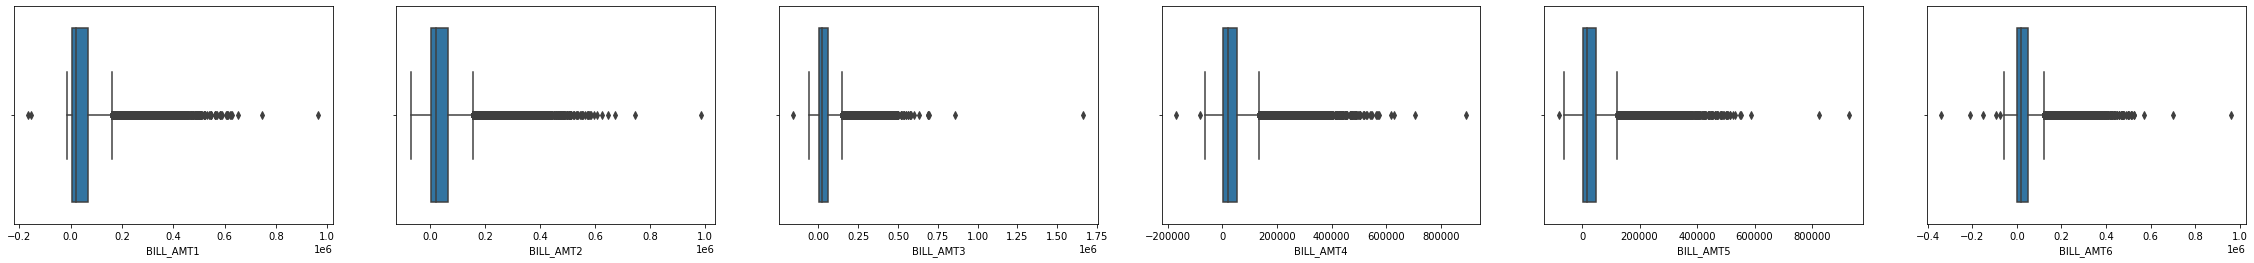

In [14]:
plt.figure(figsize=(40,4))
plt.subplot(1,6,1)
sns.boxplot(data=df, x='BILL_AMT1')
plt.subplot(1,6,2)
sns.boxplot(data=df, x='BILL_AMT2')
plt.subplot(1,6,3)
sns.boxplot(data=df, x='BILL_AMT3')
plt.subplot(1,6,4)
sns.boxplot(data=df, x='BILL_AMT4')
plt.subplot(1,6,5)
sns.boxplot(data=df, x='BILL_AMT5')
plt.subplot(1,6,6)
sns.boxplot(data=df, x='BILL_AMT6')
plt.show()

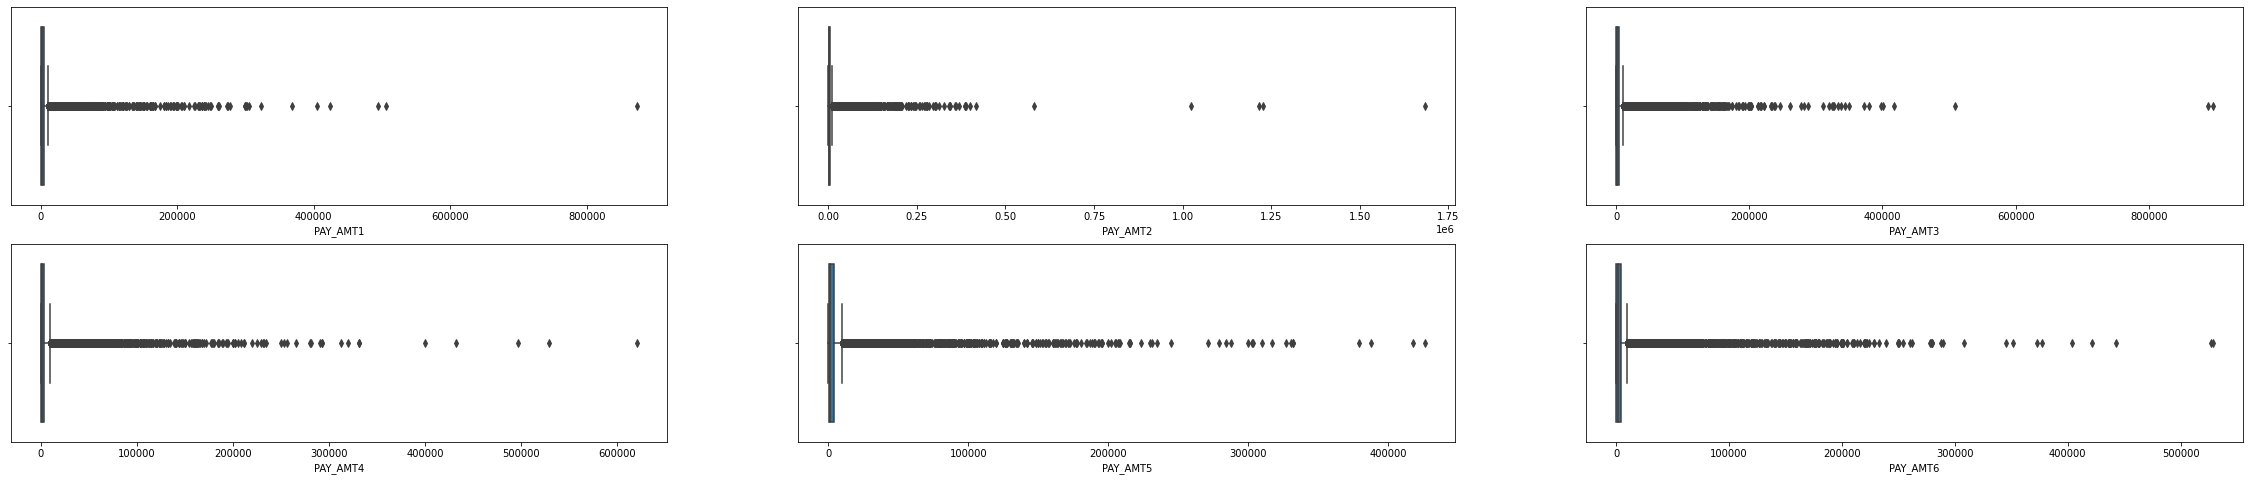

In [15]:
plt.figure(figsize=(40,8))
plt.subplot(2,3,1)
sns.boxplot(data=df, x='PAY_AMT1')
plt.subplot(2,3,2)
sns.boxplot(data=df, x='PAY_AMT2')
plt.subplot(2,3,3)
sns.boxplot(data=df, x='PAY_AMT3')
plt.subplot(2,3,4)
sns.boxplot(data=df, x='PAY_AMT4')
plt.subplot(2,3,5)
sns.boxplot(data=df, x='PAY_AMT5')
plt.subplot(2,3,6)
sns.boxplot(data=df, x='PAY_AMT6')
plt.show()

In [16]:
# Mengecek persebaran data pada kolom 'default payment next month'
df.rename(columns={'default payment next month' : 'default'}, inplace=True)
df['default'].value_counts()/len(df)*100

0    77.88
1    22.12
Name: default, dtype: float64

In [17]:
# Mengecek korelasi antara kolom numerik satu dan lainnya
df_num.corr()

0          LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0                                                                            
LIMIT_BAL   1.000000  0.144713   0.285430   0.278314   0.283236   0.293988   
AGE         0.144713  1.000000   0.056239   0.054283   0.053710   0.051353   
BILL_AMT1   0.285430  0.056239   1.000000   0.951484   0.892279   0.860272   
BILL_AMT2   0.278314  0.054283   0.951484   1.000000   0.928326   0.892482   
BILL_AMT3   0.283236  0.053710   0.892279   0.928326   1.000000   0.923969   
BILL_AMT4   0.293988  0.051353   0.860272   0.892482   0.923969   1.000000   
BILL_AMT5   0.295562  0.049345   0.829779   0.859778   0.883910   0.940134   
BILL_AMT6   0.290389  0.047613   0.802650   0.831594   0.853320   0.900941   
PAY_AMT1    0.195236  0.026147   0.140277   0.280365   0.244335   0.233012   
PAY_AMT2    0.178408  0.021785   0.099355   0.100851   0.316936   0.207564   
PAY_AMT3    0.210167  0.029247   0.156887   0.150718   0.130011   0.300023   
PAY_AMT4    0.203242  0.021379   0.158303   0.147398   0.143405   0.130191   
PAY_AMT5    0.217202  0.022850   0.167026   0.157957   0.179712   0.160433   
PAY_AMT6    0.219595  0.019478   0.179341   0.174256   0.182326   0.177637   

0          BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0                                                                         
LIMIT_BAL   0.295562   0.290389  0.195236  0.178408  0.210167  0.203242   
AGE         0.049345   0.047613  0.026147  0.021785  0.029247  0.021379   
BILL_AMT1   0.829779   0.802650  0.140277  0.099355  0.156887  0.158303   
BILL_AMT2   0.859778   0.831594  0.280365  0.100851  0.150718  0.147398   
BILL_AMT3   0.883910   0.853320  0.244335  0.316936  0.130011  0.143405   
BILL_AMT4   0.940134   0.900941  0.233012  0.207564  0.300023  0.130191   
BILL_AMT5   1.000000   0.946197  0.217031  0.181246  0.252305  0.293118   
BILL_AMT6   0.946197   1.000000  0.199965  0.172663  0.233770  0.250237   
PAY_AMT1    0.217031   0.199965  1.000000  0.285576  0.252191  0.199558   
PAY_AMT2    0.181246   0.172663  0.285576  1.000000  0.244770  0.180107   
PAY_AMT3    0.252305   0.233770  0.252191  0.244770  1.000000  0.216325   
PAY_AMT4    0.293118   0.250237  0.199558  0.180107  0.216325  1.000000   
PAY_AMT5    0.141574   0.307729  0.148459  0.180908  0.159214  0.151830   
PAY_AMT6    0.164184   0.115494  0.185735  0.157634  0.162740  0.157834   

0          PAY_AMT5  PAY_AMT6  
0                              
LIMIT_BAL  0.217202  0.219595  
AGE        0.022850  0.019478  
BILL_AMT1  0.167026  0.179341  
BILL_AMT2  0.157957  0.174256  
BILL_AMT3  0.179712  0.182326  
BILL_AMT4  0.160433  0.177637  
BILL_AMT5  0.141574  0.164184  
BILL_AMT6  0.307729  0.115494  
PAY_AMT1   0.148459  0.185735  
PAY_AMT2   0.180908  0.157634  
PAY_AMT3   0.159214  0.162740  
PAY_AMT4   0.151830  0.157834  
PAY_AMT5   1.000000  0.154896  
PAY_AMT6   0.154896  1.000000

In [18]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object', name=0)

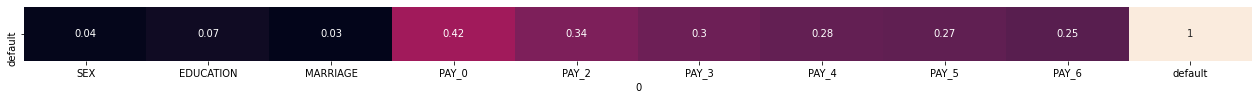

In [19]:
# Mengecek asosiasi
df_cat = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default']]
assoc_cramers = []
for i in df_cat.columns:
    assoc = round(cramers_v(df_cat['default'], df_cat[i]), 2)
    assoc_cramers.append(assoc)

data_cramers = pd.DataFrame(data = [assoc_cramers], columns = df_cat.columns, index = ['default'])

plt.figure(figsize=(22, 1))
sns.heatmap(data_cramers, annot=True, cbar=False)
plt.show()

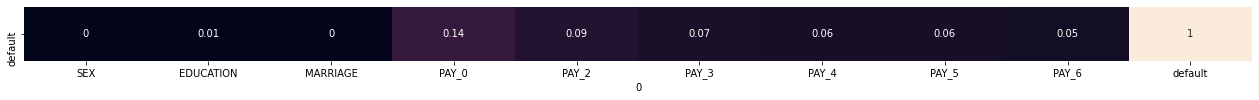

In [20]:
assoc_theils = []
for i in df_cat.columns:
    assoc = round(theils_u(df_cat['default'], df_cat[i]), 2)
    assoc_theils.append(assoc)

data_theils = pd.DataFrame(data = [assoc_theils], columns = df_cat.columns, index = ['default'])

plt.figure(figsize=(22, 1))
sns.heatmap(data_theils, annot=True, cbar=False)
plt.show()

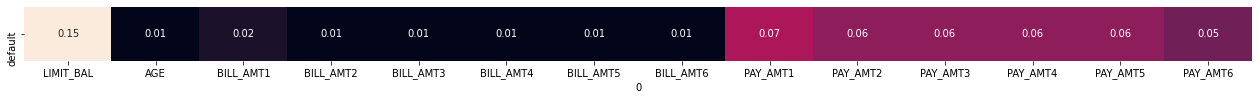

In [21]:
# Mengecek correlation ratio
corr_rat = []
for i in df_num.columns:
    a = round(correlation_ratio(df['default'], df_num[i]), 2)
    corr_rat.append(a)

data_corr_rat = pd.DataFrame(data = [corr_rat], columns = df_num.columns, index = ['default'])

plt.figure(figsize=(22, 1))
sns.heatmap(data_corr_rat, annot=True, cbar=False)
plt.show()

#### Berdasarkan asosiasi Cramer's V dan Theil's U diketahui bahwa kolom pay_0 yang memiliki asosiasi yang paling tinggi dengan kolom default
##### Berdasarkan correlation ration diketahui bahwa kolom PAY_AMT1 memiliki correlation ratio dengan kolom 'default' tertinggi dibandingkan kolom numerikal lainnya

In [22]:
df.columns = df.columns.str.lower()
df_cat.columns = df_cat.columns.str.lower()
df_num.columns = df_num.columns.str.lower()

## Analisa Univariate

In [23]:
sex = pd.crosstab(index = df["sex"], columns = 'Jumlah')
sex['Persentase'] = ''
persen = []
for a in sex["Jumlah"]:
    persen.append(a/sex['Jumlah'].sum()*100)
sex['Persentase'] = persen
sex

col_0  Jumlah  Persentase
sex                      
1       11888   39.626667
2       18112   60.373333

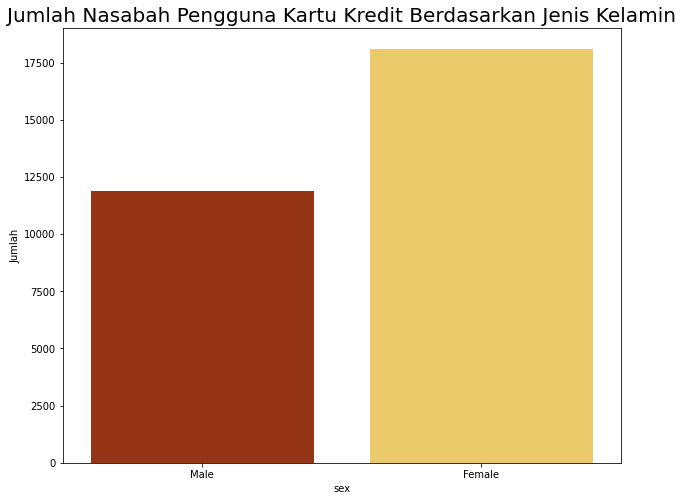

In [24]:
plt.figure(figsize=(10,8))
sns.barplot(data = sex.reset_index(), x='sex', y='Jumlah', palette='afmhot')
plt.xticks([0,1], ['Male', 'Female'])
plt.title("Jumlah Nasabah Pengguna Kartu Kredit Berdasarkan Jenis Kelamin", size=20)
plt.show()

### Sekitar 60% dari nasabah pengguna kartu kredit adalah wanita

In [25]:
ed = pd.crosstab(index = df["education"], columns = 'Jumlah')
ed['Persentase'] = ''
persen = []
for a in ed["Jumlah"]:
    persen.append(a/ed['Jumlah'].sum()*100)
ed['Persentase'] = persen
ed

col_0      Jumlah  Persentase
education                    
0              14    0.046667
1           10585   35.283333
2           14030   46.766667
3            4917   16.390000
4             123    0.410000
5             280    0.933333
6              51    0.170000

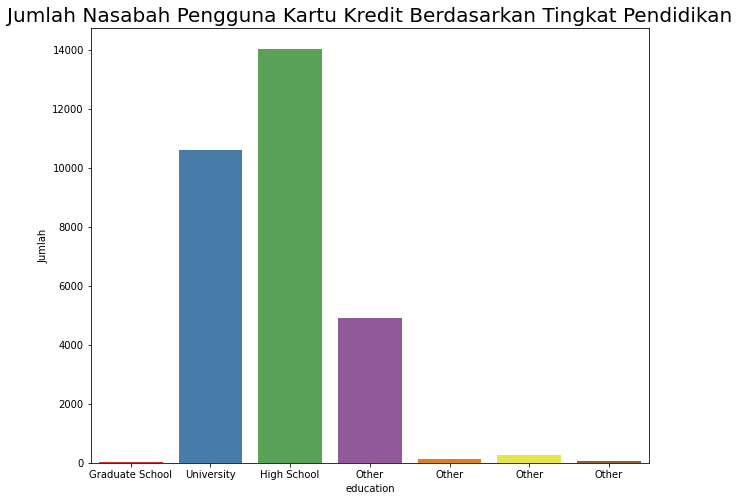

In [26]:
plt.figure(figsize=(10,8))
sns.barplot(data = ed.reset_index(), x='education', y='Jumlah', palette='Set1')
plt.xticks([0,1,2,3,4,5,6], ['Graduate School', 'University', 'High School', 'Other', 'Other', 'Other', 'Other'])
plt.title("Jumlah Nasabah Pengguna Kartu Kredit Berdasarkan Tingkat Pendidikan", size=20)
plt.show()

### Jumlah nasabah pengguna kartu kredit paling banyak memiliki tingkat pendidikan High School, kedua terbanyak university, dan terakhir Other

In [27]:
mar = pd.crosstab(index = df["marriage"], columns = 'Jumlah')
mar['Persentase'] = ''
persen = []
for a in mar["Jumlah"]:
    persen.append(a/mar['Jumlah'].sum()*100)
mar['Persentase'] = persen
mar

col_0     Jumlah  Persentase
marriage                    
0             54    0.180000
1          13659   45.530000
2          15964   53.213333
3            323    1.076667

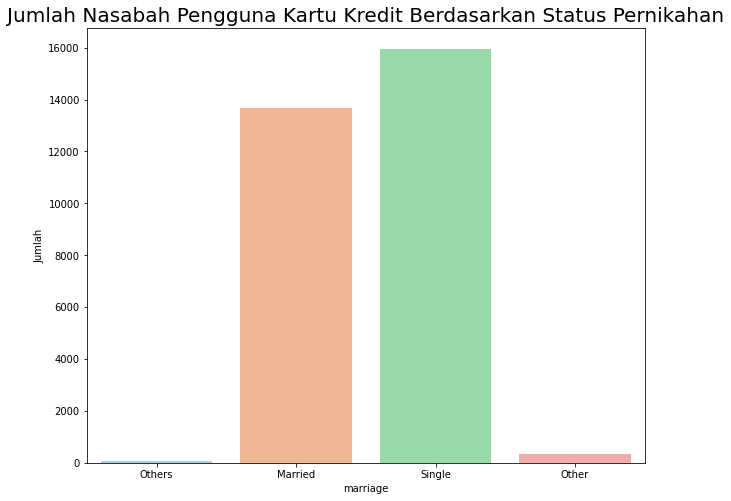

In [28]:
plt.figure(figsize=(10,8))
sns.barplot(data = mar.reset_index(), x='marriage', y='Jumlah', palette='pastel')
plt.xticks([0,1,2,3], ['Others', 'Married', 'Single', 'Other'])
plt.title("Jumlah Nasabah Pengguna Kartu Kredit Berdasarkan Status Pernikahan", size=20)
plt.show()

### Nasabah pengguna kartu kredit mayoritas berstatus single atau married

In [29]:
defa = pd.crosstab(index = df["default"], columns = 'Jumlah')
defa['Persentase'] = ''
persen = []
for a in defa["Jumlah"]:
    persen.append(a/defa['Jumlah'].sum()*100)
defa['Persentase'] = persen
defa

col_0    Jumlah  Persentase
default                    
0         23364       77.88
1          6636       22.12

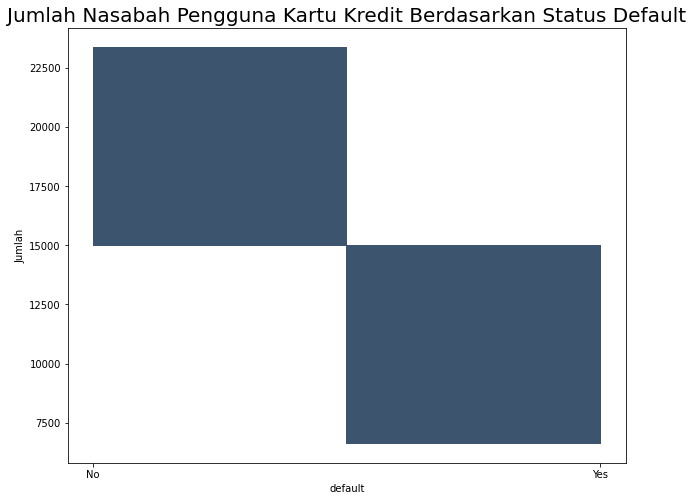

In [30]:
plt.figure(figsize=(10,8))
sns.histplot(data = defa.reset_index(), x='default', y='Jumlah', palette='pastel')
plt.xticks([0,1], ['No', 'Yes'])
plt.title("Jumlah Nasabah Pengguna Kartu Kredit Berdasarkan Status Default", size=20)
plt.show()

### Secara persentase pengguna kartu kredit yang mengalami default sebesar 22.12%. Secara business process untuk sebuah bank hal ini sangat membahayakan

In [31]:
df_num.columns

Index(['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6'],
      dtype='object', name=0)

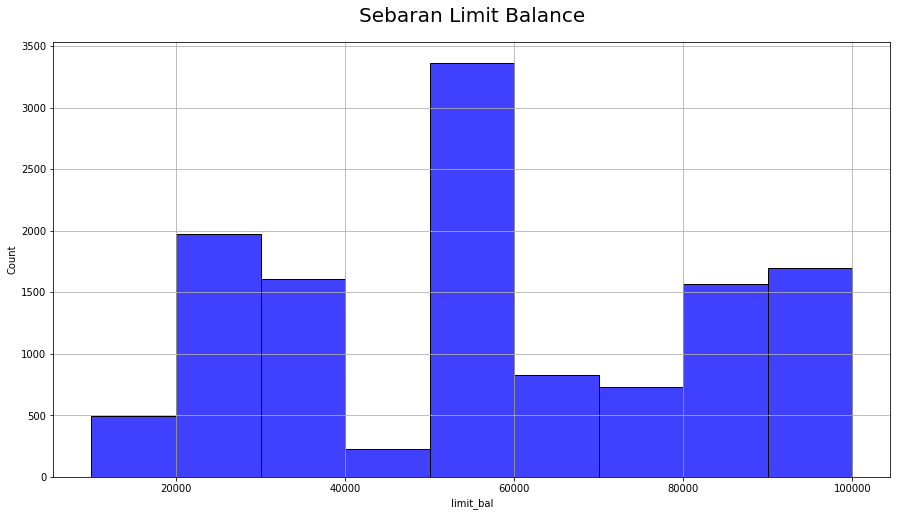

In [32]:
plt.figure(figsize=(15,8))
sns.histplot(x =df['limit_bal'], kde=False, color ='blue', stat='count', bins=np.arange(10000,110000,10000))
plt.grid()
plt.title("Sebaran Limit Balance", size = 20, pad = 20)
plt.show()

#### Limit balance terbanyak berada di angka 50000

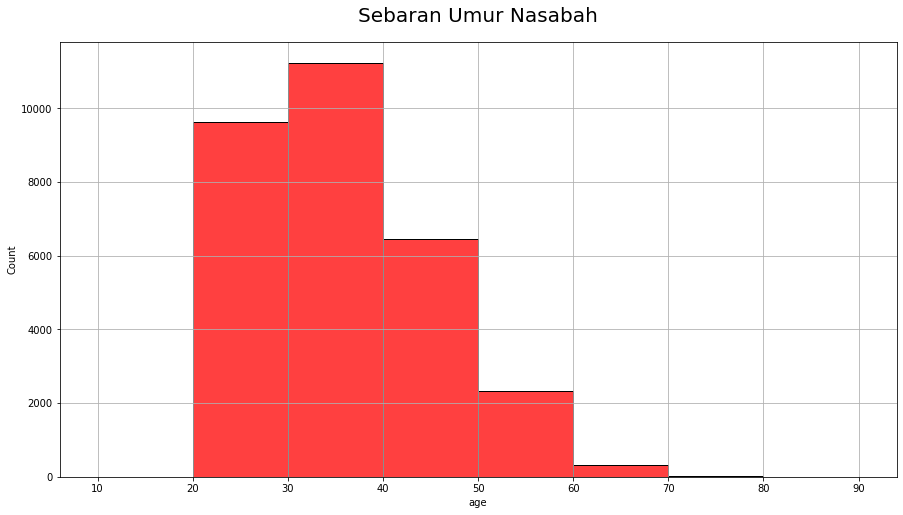

In [33]:
plt.figure(figsize=(15,8))
sns.histplot(x =df['age'], kde=False, color ='red', stat='count', bins=np.arange(10,100,10))
plt.grid()
plt.title("Sebaran Umur Nasabah", size = 20, pad = 20)
plt.show()

#### Sebaran umur nasabah pengguna kartu kredit terbesar ada di range 20 s/d 40 tahun

## Analisa Multivariate

In [34]:
pd.crosstab(index=df['sex'], columns=df['default'])

default      0     1
sex                 
1         9015  2873
2        14349  3763

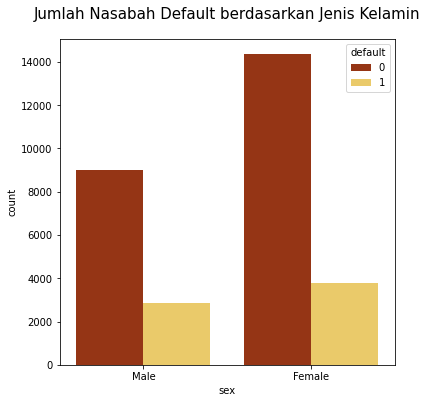

In [135]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['sex'], hue=df['default'], palette='afmhot')
plt.xticks([0,1], ['Male', 'Female'])
plt.title("Jumlah Nasabah Default berdasarkan Jenis Kelamin", size = 15, pad = 20)
plt.savefig('sex.png')
plt.show()

### Secara jumlah, nasabah dengan jenis kelamin wanita lebih banyak default daripada pria, namun secara persentase terhadap total nasabah per jenis kelamin, lebih besar persentase pria untuk default

In [36]:
pd.crosstab(index=df['education'], columns=df['default'])

default        0     1
education             
0             14     0
1           8549  2036
2          10700  3330
3           3680  1237
4            116     7
5            262    18
6             43     8

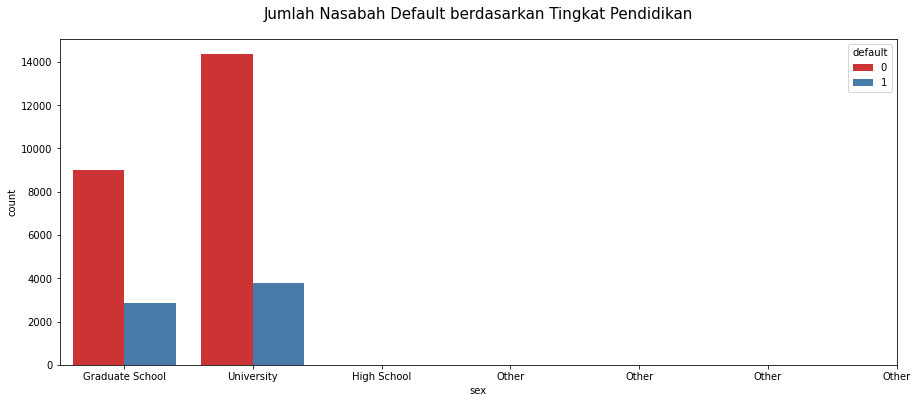

In [136]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['sex'], hue=df['default'], palette='Set1')
plt.xticks([0,1,2,3,4,5,6], ['Graduate School', 'University', 'High School', 'Other', 'Other', 'Other', 'Other'])
plt.title("Jumlah Nasabah Default berdasarkan Tingkat Pendidikan", size = 15, pad = 20)
plt.savefig('edu.png')
plt.show()

### Secara jumlah, nasabah dengan tingkat pendidikan university lebih banyak default daripada graduate school, namun secara persentase terhadap total nasabah per tingkat pendidikan, lebih besar persentase graduate school untuk default

In [38]:
pd.crosstab(index=df['marriage'], columns=df['default'])

default       0     1
marriage             
0            49     5
1         10453  3206
2         12623  3341
3           239    84

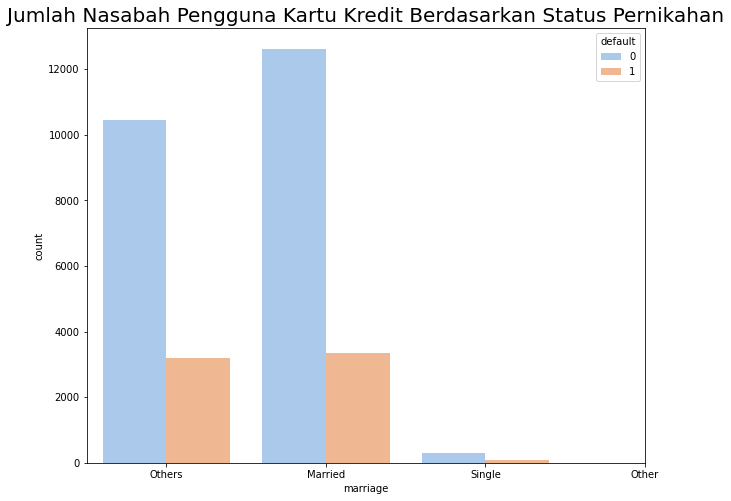

In [137]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['marriage'], palette='pastel', hue=df['default'])
plt.xticks([0,1,2,3], ['Others', 'Married', 'Single', 'Other'])
plt.title("Jumlah Nasabah Pengguna Kartu Kredit Berdasarkan Status Pernikahan", size=20)
plt.savefig('mar.png')
plt.show()

### Secara jumlah, nasabah dengan status pernikahan single lebih banyak default daripada married, namun secara persentase terhadap total nasabah per status pernikahan, lebih besar persentase married untuk default

In [40]:
pay = pd.crosstab(index = df["default"], columns = df['pay_0'])
pay

pay_0      -2    -1      0     1     2    3   4   5   6   7   8
default                                                        
0        2394  4732  12849  2436   823   78  24  13   5   2   8
1         365   954   1888  1252  1844  244  52  13   6   7  11

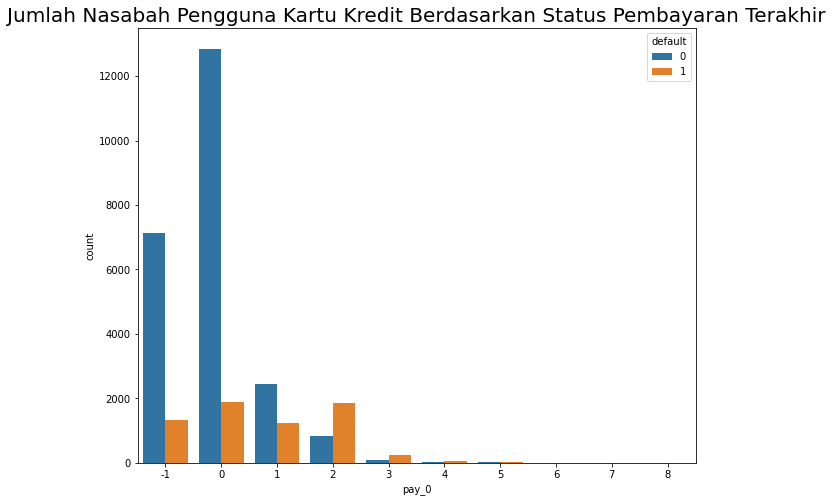

In [138]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['pay_0'], hue=df['default'])
# plt.xticks([0,1,2,3], ['Others', 'Married', 'Single', 'Other'])
plt.title("Jumlah Nasabah Pengguna Kartu Kredit Berdasarkan Status Pembayaran Terakhir", size=20)
plt.savefig('pay0.png')
plt.show()

### Berdasarkan status pembayaran, yang diprediksikan default pada bulan berikutnya rata-rata memiliki status payment 0 s/d 2, 0 = pembayaran tepat waktu, 1 = pembayaran telat sebulan, 2 = pembayaran telat 2 bulan

In [42]:
df_num.columns

Index(['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6'],
      dtype='object', name=0)

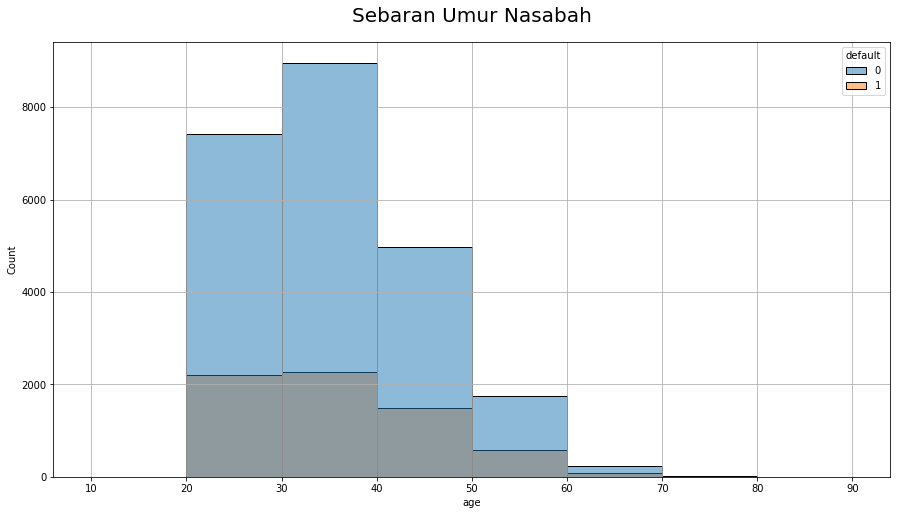

In [139]:
plt.figure(figsize=(15,8))
sns.histplot(x =df['age'], kde=False, color ='red', stat='count', bins=np.arange(10,100,10), hue=df['default'])
plt.grid()
plt.title("Sebaran Umur Nasabah", size = 20, pad = 20)
plt.savefig('age.png')
plt.show()

### Nasabah default terbanyak berada di sebaran umur 20 s/d 50

# Machine Learning Model

#### Base Model

In [127]:
df['pay_0'].unique()

array([ 2, -1,  0,  1,  3,  4,  8,  7,  5,  6])

In [128]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object', name=0)

In [44]:
cat = ['sex', 'education', 'marriage', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
df1 = pd.get_dummies(data=df, columns=cat)

In [45]:
x = df1.drop(columns='default')
y = df1['default']

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, stratify=y, random_state=69, test_size=0.2)

In [47]:
def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    Acc = accuracy_score(y_true, y_pred)
    Rec = recall_score(y_true, y_pred)
    Prec = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return Acc, Rec, Prec, f1

In [48]:
KNN_base = KNeighborsClassifier()
LR_base = LogisticRegression()
DT_base = DecisionTreeClassifier()
RF_base = RandomForestClassifier()

In [50]:
KNN_base.fit(xtrain, ytrain)
LR_base.fit(xtrain, ytrain)
DT_base.fit(xtrain, ytrain)
RF_base.fit(xtrain, ytrain)

C:\Users\ASUS ROG\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [51]:
KNN_acc_train, KNN_rec_train, KNN_prec_train, KNN_f1_train = Eva_Matrix(KNN_base, xtrain, ytrain)
LR_acc_train, LR_rec_train, LR_prec_train, LR_f1_train = Eva_Matrix(LR_base, xtrain, ytrain)
RF_acc_train, RF_rec_train, RF_prec_train, RF_f1_train = Eva_Matrix(RF_base, xtrain, ytrain)
DT_acc_train, DT_rec_train, DT_prec_train, DT_f1_train = Eva_Matrix(DT_base, xtrain, ytrain)
KNN_acc_test, KNN_rec_test, KNN_prec_test, KNN_f1_test = Eva_Matrix(KNN_base, xtest, ytest)
LR_acc_test, LR_rec_test, LR_prec_test, LR_f1_test = Eva_Matrix(LR_base, xtest, ytest)
RF_acc_test, RF_rec_test, RF_prec_test, RF_f1_test = Eva_Matrix(RF_base, xtest, ytest)
DT_acc_test, DT_rec_test, DT_prec_test, DT_f1_test = Eva_Matrix(DT_base, xtest, ytest)

In [52]:
data = {
    "KNN Train" : [KNN_acc_train, KNN_rec_train, KNN_prec_train, KNN_f1_train],
    "KNN Test" : [KNN_acc_test, KNN_rec_test, KNN_prec_test, KNN_f1_test],
    "LR Train" : [LR_acc_train, LR_rec_train, LR_prec_train, LR_f1_train],
    "LR Test" : [LR_acc_test, LR_rec_test, LR_prec_test, LR_f1_test],
    "RF Train" : [RF_acc_train, RF_rec_train, RF_prec_train, RF_f1_train],
    "RF Test" : [RF_acc_test, RF_rec_test, RF_prec_test, RF_f1_test],
    "DT Train" : [DT_acc_train, DT_rec_train, DT_prec_train, DT_f1_train],
    "DT Test" : [DT_acc_test, DT_rec_test, DT_prec_test, DT_f1_test]
}
pd.DataFrame(data=data, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

KNN Train  KNN Test  LR Train   LR Test  RF Train   RF Test  \
Accuracy    0.818792  0.754333  0.778708  0.778833  0.999417  0.826833   
Recall      0.343756  0.178598  0.000565  0.000754  0.998116  0.393369   
Precision   0.678439  0.381643  0.375000  0.500000  0.999246  0.690476   
F1          0.456307  0.243326  0.001128  0.001505  0.998681  0.501200   

           DT Train   DT Test  
Accuracy   0.999417  0.740500  
Recall     0.997551  0.428033  
Precision  0.999811  0.415813  
F1         0.998680  0.421834

## Data Preprocessing - Recategorize
#### Berdasarkan informasi yang didapatkan, terdapat beberapa kolom kategorikal yg memiliki isi di luar ketentuan sehingga dilakukan recategorize

In [53]:
df_cat

0      sex  education  marriage  pay_0  pay_2  pay_3  pay_4  pay_5  pay_6  \
ID                                                                          
1        2          2         1      2      2     -1     -1     -2     -2   
2        2          2         2     -1      2      0      0      0      2   
3        2          2         2      0      0      0      0      0      0   
4        2          2         1      0      0      0      0      0      0   
5        1          2         1     -1      0     -1      0      0      0   
...    ...        ...       ...    ...    ...    ...    ...    ...    ...   
29996    1          3         1      0      0      0      0      0      0   
29997    1          3         2     -1     -1     -1     -1      0      0   
29998    1          2         2      4      3      2     -1      0      0   
29999    1          3         1      1     -1      0      0      0     -1   
30000    1          2         1      0      0      0      0      0      0   

0      default  
ID              
1            1  
2            1  
3            0  
4            0  
5            0  
...        ...  
29996        0  
29997        0  
29998        1  
29999        1  
30000        1  

[30000 rows x 10 columns]

In [54]:
df['education'][df['education'] == 0] = 4
df['education'][df['education'] >=4] = 4

In [55]:
df['education'].unique()

array([2, 1, 3, 4])

In [56]:
df['marriage'][df['marriage'] == 0] = 3

In [57]:
df['marriage'].unique()

array([1, 2, 3])

In [58]:
df['pay_0'][df['pay_0'] == -2] = -1
df['pay_2'][df['pay_2'] == -2] = -1
df['pay_3'][df['pay_3'] == -2] = -1
df['pay_4'][df['pay_4'] == -2] = -1
df['pay_5'][df['pay_5'] == -2] = -1
df['pay_6'][df['pay_6'] == -2] = -1

In [59]:
df['pay_4'].unique()

array([-1,  0,  2,  3,  4,  5,  7,  6,  1,  8])

## Data Preprocessing - Oversampling

In [60]:
sm = SMOTE(random_state=69)

In [61]:
xtrain_sm, ytrain_sm = sm.fit_sample(xtrain, ytrain)

In [62]:
KNN_sm = KNeighborsClassifier().fit(xtrain_sm, ytrain_sm)
LR_sm = LogisticRegression().fit(xtrain_sm, ytrain_sm)
DT_sm = DecisionTreeClassifier().fit(xtrain_sm, ytrain_sm)
RF_sm = RandomForestClassifier().fit(xtrain_sm, ytrain_sm)

C:\Users\ASUS ROG\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
KNNsm_acc_train, KNNsm_rec_train, KNNsm_prec_train, KNNsm_f1_train = Eva_Matrix(KNN_sm, xtrain, ytrain)
LRsm_acc_train, LRsm_rec_train, LRsm_prec_train, LRsm_f1_train = Eva_Matrix(LR_sm, xtrain, ytrain)
RFsm_acc_train, RFsm_rec_train, RFsm_prec_train, RFsm_f1_train = Eva_Matrix(RF_sm, xtrain, ytrain)
DTsm_acc_train, DTsm_rec_train, DTsm_prec_train, DTsm_f1_train = Eva_Matrix(DT_sm, xtrain, ytrain)
KNNsm_acc_test, KNNsm_rec_test, KNNsm_prec_test, KNNsm_f1_test = Eva_Matrix(KNN_sm, xtest, ytest)
LRsm_acc_test, LRsm_rec_test, LRsm_prec_test, LRsm_f1_test = Eva_Matrix(LR_sm, xtest, ytest)
RFsm_acc_test, RFsm_rec_test, RFsm_prec_test, RFsm_f1_test = Eva_Matrix(RF_sm, xtest, ytest)
DTsm_acc_test, DTsm_rec_test, DTsm_prec_test, DTsm_f1_test = Eva_Matrix(DT_sm, xtest, ytest)

data_sm = {
    "KNNsm Train" : [KNNsm_acc_train, KNNsm_rec_train, KNNsm_prec_train, KNNsm_f1_train],
    "KNNsm Test" : [KNNsm_acc_test, KNNsm_rec_test, KNNsm_prec_test, KNNsm_f1_test],
    "LRsm Train" : [LRsm_acc_train, LRsm_rec_train, LRsm_prec_train, LRsm_f1_train],
    "LRsm Test" : [LRsm_acc_test, LRsm_rec_test, LRsm_prec_test, LRsm_f1_test],
    "RFsm Train" : [RFsm_acc_train, RFsm_rec_train, RFsm_prec_train, RFsm_f1_train],
    "RFsm Test" : [RFsm_acc_test, RFsm_rec_test, RFsm_prec_test, RFsm_f1_test],
    "DTsm Train" : [DTsm_acc_train, DTsm_rec_train, DTsm_prec_train, DTsm_f1_train],
    "DTsm Test" : [DTsm_acc_test, DTsm_rec_test, DTsm_prec_test, DTsm_f1_test]
}
pd.DataFrame(data=data_sm, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

KNNsm Train  KNNsm Test  LRsm Train  LRsm Test  RFsm Train  \
Accuracy      0.775417    0.601500    0.690417   0.699167    0.999417   
Recall        0.911283    0.518463    0.356188   0.373775    0.998493   
Precision     0.495849    0.281967    0.320346   0.337415    0.998869   
F1            0.642241    0.365277    0.337317   0.354666    0.998681   

           RFsm Test  DTsm Train  DTsm Test  
Accuracy    0.823333    0.999417   0.728667  
Recall      0.433308    0.997928   0.455162  
Precision   0.651189    0.999434   0.400265  
F1          0.520362    0.998680   0.425952

## Feature Engineering dan Feature Selection

In [64]:
df_num.columns

Index(['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6'],
      dtype='object', name=0)

### Feature Selection menggunakan semua kolom karena tidak ada kolom yang secara langsung menentukan hasil pada kolom target (kolom default)

In [65]:
num_columns = df_num.columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])


preproccess = ColumnTransformer([
    ('numerical', num_pipeline, num_columns)
])

pipe_KNN = Pipeline([
    ('prep', preproccess),
    ('algorithm', KNeighborsClassifier())
])

pipe_LR = Pipeline([
    ('prep', preproccess),
    ('algorithm', LogisticRegression())
])

pipe_RF = Pipeline([
    ('prep', preproccess),
    ('algorithm', RandomForestClassifier())
])

pipe_DT = Pipeline([
    ('prep', preproccess),
    ('algorithm', DecisionTreeClassifier())
])

In [66]:
cat = ['sex', 'education', 'marriage', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
df1 = pd.get_dummies(data=df, columns=cat)

In [67]:
x1 = df1.drop(columns='default')
y1 = df1['default']
xp_train, xp_test, yp_train, yp_test = train_test_split(x1,y1,stratify=y1, test_size=0.2, random_state=42)

### SMOTe - Pipeline

In [68]:
xps_train, yps_train = sm.fit_sample(xp_train, yp_train)

### Oversampling - Pipeline

In [69]:
nd = df1[df1['default'] == 0] 
d = df1[df1['default'] == 1]
os = resample(d, replace=True, n_samples=len(nd), random_state = 69)
df_os = pd.concat([nd, os]) 
osxp_train = df_os.drop(columns='default')
osyp_train = df_os['default']

In [70]:
pipe_KNN.fit(xps_train, yps_train)
pipe_LR.fit(xps_train, yps_train)
pipe_RF.fit(xps_train, yps_train)
pipe_DT.fit(xps_train, yps_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6'],
      dtype='object', name=0))])),
                ('algorithm', DecisionTreeClassifier())])

In [71]:
KNN_acc_ptrain, KNN_rec_ptrain, KNN_prec_ptrain, KNN_f1_ptrain = Eva_Matrix(pipe_KNN, xp_train, yp_train)
LR_acc_ptrain, LR_rec_ptrain, LR_prec_ptrain, LR_f1_ptrain = Eva_Matrix(pipe_LR, xp_train, yp_train)
RF_acc_ptrain, RF_rec_ptrain, RF_prec_ptrain, RF_f1_ptrain = Eva_Matrix(pipe_RF, xp_train, yp_train)
DT_acc_ptrain, DT_rec_ptrain, DT_prec_ptrain, DT_f1_ptrain = Eva_Matrix(pipe_DT, xp_train, yp_train)
KNN_acc_ptest, KNN_rec_ptest, KNN_prec_ptest, KNN_f1_ptest = Eva_Matrix(pipe_KNN, xp_test, yp_test)
LR_acc_ptest, LR_rec_ptest, LR_prec_ptest, LR_f1_ptest = Eva_Matrix(pipe_LR, xp_test, yp_test)
RF_acc_ptest, RF_rec_ptest, RF_prec_ptest, RF_f1_ptest = Eva_Matrix(pipe_RF, xp_test, yp_test)
DT_acc_ptest, DT_rec_ptest, DT_prec_ptest, DT_f1_ptest = Eva_Matrix(pipe_DT, xp_test, yp_test)

In [72]:
data_ps = {
    "KNN Train PS" : [KNN_acc_ptrain, KNN_rec_ptrain, KNN_prec_ptrain, KNN_f1_ptrain],
    "KNN Test PS" : [KNN_acc_ptest, KNN_rec_ptest, KNN_prec_ptest, KNN_f1_ptest],
    "LR Train PS" : [LR_acc_ptrain, LR_rec_ptrain, LR_prec_ptrain, LR_f1_ptrain],
    "LR Test PS" : [LR_acc_ptest, LR_rec_ptest, LR_prec_ptest, LR_f1_ptest],
    "RF Train PS" : [RF_acc_ptrain, RF_rec_ptrain, RF_prec_ptrain, RF_f1_ptrain],
    "RF Test PS" : [RF_acc_ptest, RF_rec_ptest, RF_prec_ptest, RF_f1_ptest],
    "DT Train PS" : [DT_acc_ptrain, DT_rec_ptrain, DT_prec_ptrain, DT_f1_ptrain],
    "DT Test PS" : [DT_acc_ptest, DT_rec_ptest, DT_prec_ptest, DT_f1_ptest]
}
pd.DataFrame(data=data_ps, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

KNN Train PS  KNN Test PS  LR Train PS  LR Test PS  RF Train PS  \
Accuracy       0.777333     0.621667     0.549500    0.541167     0.994208   
Recall         0.859672     0.568953     0.733471    0.715901     0.997740   
Precision      0.498090     0.307786     0.292980    0.285628     0.976586   
F1             0.630735     0.399471     0.418710    0.408339     0.987049   

           RF Test PS  DT Train PS  DT Test PS  
Accuracy     0.752500     0.995458    0.652833  
Recall       0.398644     0.995668    0.431047  
Precision    0.435033     0.983991    0.301053  
F1           0.416044     0.989795    0.354509

In [73]:
osxp_train.shape

(46728, 81)

In [74]:
osyp_train.shape

(46728,)

In [75]:
osxp_train.head()

limit_bal  age  bill_amt1  bill_amt2  bill_amt3  bill_amt4  bill_amt5  \
ID                                                                          
3       90000   34      29239      14027      13559      14331      14948   
4       50000   37      46990      48233      49291      28314      28959   
5       50000   57       8617       5670      35835      20940      19146   
6       50000   37      64400      57069      57608      19394      19619   
7      500000   29     367965     412023     445007     542653     483003   

    bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  \
ID                                                                          
3       15549      1518      1500      1000      1000      1000      5000   
4       29547      2000      2019      1200      1100      1069      1000   
5       19131      2000     36681     10000      9000       689       679   
6       20024      2500      1815       657      1000      1000       800   
7      473944     55000     40000     38000     20239     13750     13770   

    sex_1  sex_2  education_1  education_2  education_3  education_4  \
ID                                                                     
3       0      1            0            1            0            0   
4       0      1            0            1            0            0   
5       1      0            0            1            0            0   
6       1      0            1            0            0            0   
7       1      0            1            0            0            0   

    marriage_1  marriage_2  marriage_3  pay_0_-1  pay_0_0  pay_0_1  pay_0_2  \
ID                                                                            
3            0           1           0         0        1        0        0   
4            1           0           0         0        1        0        0   
5            1           0           0         1        0        0        0   
6            0           1           0         0        1        0        0   
7            0           1           0         0        1        0        0   

    pay_0_3  pay_0_4  pay_0_5  pay_0_6  pay_0_7  pay_0_8  pay_2_-1  pay_2_0  \
ID                                                                            
3         0        0        0        0        0        0         0        1   
4         0        0        0        0        0        0         0        1   
5         0        0        0        0        0        0         0        1   
6         0        0        0        0        0        0         0        1   
7         0        0        0        0        0        0         0        1   

    pay_2_1  pay_2_2  pay_2_3  pay_2_4  pay_2_5  pay_2_6  pay_2_7  pay_2_8  \
ID                                                                           
3         0        0        0        0        0        0        0        0   
4         0        0        0        0        0        0        0        0   
5         0        0        0        0        0        0        0        0   
6         0        0        0        0        0        0        0        0   
7         0        0        0        0        0        0        0        0   

    pay_3_-1  pay_3_0  pay_3_1  pay_3_2  pay_3_3  pay_3_4  pay_3_5  pay_3_6  \
ID                                                                            
3          0        1        0        0        0        0        0        0   
4          0        1        0        0        0        0        0        0   
5          1        0        0        0        0        0        0        0   
6          0        1        0        0        0        0        0        0   
7          0        1        0        0        0        0        0        0   

    pay_3_7  pay_3_8  pay_4_-1  pay_4_0  pay_4_1  pay_4_2  pay_4_3  pay_4_4  \
ID                                                                            
3         0        0         0        1        0    

In [76]:
pipe_KNN.fit(osxp_train, osyp_train)
pipe_LR.fit(osxp_train, osyp_train)
pipe_RF.fit(osxp_train, osyp_train)
pipe_DT.fit(osxp_train, osyp_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6'],
      dtype='object', name=0))])),
                ('algorithm', DecisionTreeClassifier())])

In [77]:
KNN_acc_ptrain, KNN_rec_ptrain, KNN_prec_ptrain, KNN_f1_ptrain = Eva_Matrix(pipe_KNN, xp_train, yp_train)
LR_acc_ptrain, LR_rec_ptrain, LR_prec_ptrain, LR_f1_ptrain = Eva_Matrix(pipe_LR, xp_train, yp_train)
RF_acc_ptrain, RF_rec_ptrain, RF_prec_ptrain, RF_f1_ptrain = Eva_Matrix(pipe_RF, xp_train, yp_train)
DT_acc_ptrain, DT_rec_ptrain, DT_prec_ptrain, DT_f1_ptrain = Eva_Matrix(pipe_DT, xp_train, yp_train)
KNN_acc_ptest, KNN_rec_ptest, KNN_prec_ptest, KNN_f1_ptest = Eva_Matrix(pipe_KNN, xp_test, yp_test)
LR_acc_ptest, LR_rec_ptest, LR_prec_ptest, LR_f1_ptest = Eva_Matrix(pipe_LR, xp_test, yp_test)
RF_acc_ptest, RF_rec_ptest, RF_prec_ptest, RF_f1_ptest = Eva_Matrix(pipe_RF, xp_test, yp_test)
DT_acc_ptest, DT_rec_ptest, DT_prec_ptest, DT_f1_ptest = Eva_Matrix(pipe_DT, xp_test, yp_test)

In [78]:
data_pos = {
    "KNN Train POS" : [KNN_acc_ptrain, KNN_rec_ptrain, KNN_prec_ptrain, KNN_f1_ptrain],
    "KNN Test POS" : [KNN_acc_ptest, KNN_rec_ptest, KNN_prec_ptest, KNN_f1_ptest],
    "LR Train POS" : [LR_acc_ptrain, LR_rec_ptrain, LR_prec_ptrain, LR_f1_ptrain],
    "LR Test POS" : [LR_acc_ptest, LR_rec_ptest, LR_prec_ptest, LR_f1_ptest],
    "RF Train POS" : [RF_acc_ptrain, RF_rec_ptrain, RF_prec_ptrain, RF_f1_ptrain],
    "RF Test POS" : [RF_acc_ptest, RF_rec_ptest, RF_prec_ptest, RF_f1_ptest],
    "DT Train POS" : [DT_acc_ptrain, DT_rec_ptrain, DT_prec_ptrain, DT_f1_ptrain],
    "DT Test POS" : [DT_acc_ptest, DT_rec_ptest, DT_prec_ptest, DT_f1_ptest]
}
pd.DataFrame(data=data_pos, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

KNN Train POS  KNN Test POS  LR Train POS  LR Test POS  \
Accuracy        0.771125      0.767000      0.547833     0.539667   
Recall          0.863063      0.895252      0.724995     0.708365   
Precision       0.490158      0.485492      0.290688     0.283560   
F1              0.625230      0.629571      0.414987     0.404998   

           RF Train POS  RF Test POS  DT Train POS  DT Test POS  
Accuracy       0.990708     0.992167      0.990500     0.994000  
Recall         0.976455     0.978146      0.974383     0.983421  
Precision      0.981446     0.986322      0.982526     0.989386  
F1             0.978944     0.982217      0.978438     0.986395

In [79]:
pd.DataFrame(confusion_matrix(yp_test, pipe_KNN.predict(xp_test), labels=[1,0]), index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])

Pred 1  Pred 0
Akt 1    1188     139
Akt 0    1259    3414

In [80]:
pd.DataFrame(confusion_matrix(yp_test, pipe_RF.predict(xp_test), labels=[1,0]), index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])

Pred 1  Pred 0
Akt 1    1298      29
Akt 0      18    4655

In [81]:
pd.DataFrame(confusion_matrix(yp_test, pipe_DT.predict(xp_test), labels=[1,0]), index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])

Pred 1  Pred 0
Akt 1    1305      22
Akt 0      14    4659

In [82]:
skf = StratifiedKFold(n_splits=3, random_state=69, shuffle=True)

In [83]:
pipe_KNN.get_params()

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('imputer', SimpleImputer()),
                                                    ('scaler', RobustScaler())]),
                                    Index(['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
          'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
          'pay_amt4', 'pay_amt5', 'pay_amt6'],
         dtype='object', name=0))])),
  ('algorithm', KNeighborsClassifier())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('scaler', RobustScaler())]),
                                  Index(['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
        'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
        'pay_amt4',

In [84]:
param_KNN = {
    'algorithm__n_neighbors': np.arange(1,53,2),
    'algorithm__p': [1, 2],
    'algorithm__weights': ['uniform', 'distance']
}

In [85]:
KNN_GS = GridSearchCV(pipe_KNN, param_KNN, cv = skf, scoring='recall', n_jobs=-1, verbose=1)

In [86]:
KNN_GS.fit(xps_train, yps_train)

Fitting 3 folds for each of 104 candidates, totalling 312 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=69, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6'],
      dtype='object', name=0))])),
                                       ('algorithm', KNeighborsClassifie

In [87]:
KNN_GS.best_params_

{'algorithm__n_neighbors': 1,
 'algorithm__p': 1,
 'algorithm__weights': 'uniform'}

In [88]:
KNN_Tuned = KNN_GS.best_estimator_

In [89]:
KNN_GS_acc_train, KNN_GS_rec_train, KNN_GS_prec_train, KNN_GS_f1_train = Eva_Matrix(KNN_GS, xp_train, yp_train)
KNN_GS_acc_test, KNN_GS_rec_test, KNN_GS_prec_test, KNN_GS_f1_test = Eva_Matrix(KNN_GS, xp_test, yp_test)

In [90]:
data_knngs = {
    "KNN GS Train" : [KNN_GS_acc_train, KNN_GS_rec_train, KNN_GS_prec_train, KNN_GS_f1_train],
    "KNN GS Test" : [KNN_GS_acc_test, KNN_GS_rec_test, KNN_GS_prec_test, KNN_GS_f1_test]
}
pd.DataFrame(data=data_knngs, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

KNN GS Train  KNN GS Test
Accuracy       0.996333     0.647500
Recall         0.991335     0.440090
Precision      0.992083     0.298569
F1             0.991709     0.355772

In [91]:
pd.DataFrame(confusion_matrix(yp_test, KNN_GS.predict(xp_test), labels=[1,0]), index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])

Pred 1  Pred 0
Akt 1     584     743
Akt 0    1372    3301

In [92]:
param_LR = {
    'algorithm__C': np.arange(11,101,10),
    'algorithm__solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'algorithm__fit_intercept': [True, False]
}

In [93]:
LR_GS = GridSearchCV(pipe_LR, param_LR, cv = skf, scoring='recall', n_jobs=-1, verbose=1)

In [94]:
LR_GS.fit(xps_train, yps_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
C:\Users\ASUS ROG\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=69, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6'],
      dtype='object', name=0))])),
                                       ('algorithm', LogisticRegression(

In [95]:
LR_GS.best_params_

{'algorithm__C': 91,
 'algorithm__fit_intercept': True,
 'algorithm__solver': 'saga'}

In [96]:
LR_Tuned = LR_GS.best_estimator_

In [97]:
LR_GS_acc_train, LR_GS_rec_train, LR_GS_prec_train, LR_GS_f1_train = Eva_Matrix(LR_GS, xps_train, yps_train)
LR_GS_acc_test, LR_GS_rec_test, LR_GS_prec_test, LR_GS_f1_test = Eva_Matrix(LR_GS, xp_test, yp_test)

In [98]:
data_lrgs ={
    "LR GS Train" : [LR_GS_acc_train, LR_GS_rec_train, LR_GS_prec_train, LR_GS_f1_train],
    "LR GS Test" : [LR_GS_acc_test, LR_GS_rec_test, LR_GS_prec_test, LR_GS_f1_test]
}
pd.DataFrame(data=data_lrgs, index = ['Accuracy', 'Recall', 'Precision', 'F1'])


LR GS Train  LR GS Test
Accuracy      0.619897    0.539833
Recall        0.747151    0.722683
Precision     0.595573    0.286098
F1            0.662806    0.409917

In [99]:
pd.DataFrame(confusion_matrix(yp_test, LR_Tuned.predict(xp_test), labels=[1,0]), index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])

Pred 1  Pred 0
Akt 1     959     368
Akt 0    2393    2280

In [100]:
pipe_RF.get_params()

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('imputer', SimpleImputer()),
                                                    ('scaler', RobustScaler())]),
                                    Index(['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
          'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
          'pay_amt4', 'pay_amt5', 'pay_amt6'],
         dtype='object', name=0))])),
  ('algorithm', RandomForestClassifier())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('scaler', RobustScaler())]),
                                  Index(['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
        'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
        'pay_amt4

In [101]:
param_RF = {
    'algorithm__min_samples_leaf': np.arange(1, 101, 10),
    'algorithm__min_samples_split': np.arange(1, 101, 10)
    # 'algorithm__n_estimators': np.arange(100,300,100),
}

In [102]:
RF_GS = GridSearchCV(pipe_RF, param_RF, cv = skf, scoring='recall', n_jobs=-1, verbose=1)

In [103]:
RF_GS.fit(xps_train, yps_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
C:\Users\ASUS ROG\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.79000591 0.77128013 0.75833254 0.75196583 0.74292433
 0.74126587 0.7378951  0.73554102 0.7299234         nan 0.76004488
 0.75929584 0.75432018 0.74661596 0.74196135 0.74051673 0.73554115
 0.73286601 0.72976298        nan 0.7385908  0.73987487 0.7416938
 0.73928622 0.73671808 0.73703931 0.7334543  0.73115407 0.72928172
        nan 0.72938841 0.72997694 0.73013754 0.73083309 0.73158213
 0.73104693 0.72847899 0.72633901 0.7270345         nan 0.72746246
 0.72639232 0.72623189 0.72435933 0.72425236 0.72484102 0.72484089
 0.72558987 0.72510826        nan 0.72430574 0.72179139 0.72237993
 0.72312875 0.72248678 0.72211239 0.71922323 0.72339638 0.72237991
        nan 0.71826022 0.72007941 0.71949068 0.72034688 0.71954417
 0.71890229 0.72034669 0.7

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=69, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6'],
      dtype='object', name=0))])),
                                       ('algorithm',
                   

In [104]:
RF_GS.best_params_

{'algorithm__min_samples_leaf': 1, 'algorithm__min_samples_split': 11}

In [105]:
RF_Tuned = RF_GS.best_estimator_

In [106]:
RF_GS_acc_train, RF_GS_rec_train, RF_GS_prec_train, RF_GS_f1_train = Eva_Matrix(RF_GS, xp_train, yp_train)
RF_GS_acc_test, RF_GS_rec_test, RF_GS_prec_test, RF_GS_f1_test = Eva_Matrix(RF_GS, xp_test, yp_test)

In [107]:
data_rfgs ={
    "RF GS Train" : [RF_GS_acc_train, RF_GS_rec_train, RF_GS_prec_train, RF_GS_f1_train],
    "RF GS Test" : [RF_GS_acc_test, RF_GS_rec_test, RF_GS_prec_test, RF_GS_f1_test]
}
pd.DataFrame(data=data_rfgs, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

RF GS Train  RF GS Test
Accuracy      0.972750    0.743333
Recall        0.949520    0.423512
Precision     0.928874    0.420344
F1            0.939083    0.421922

In [108]:
pd.DataFrame(confusion_matrix(yp_test, RF_Tuned.predict(xp_test), labels=[1,0]), index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])

Pred 1  Pred 0
Akt 1     562     765
Akt 0     775    3898

In [109]:
param_DT = {
    'algorithm__min_samples_leaf': np.arange(1, 101, 10),
    'algorithm__min_samples_split': np.arange(1, 101, 10)
}

In [110]:
DT_GS = GridSearchCV(pipe_DT, param_DT, cv = skf, scoring='recall', n_jobs=-1, verbose=1)

In [111]:
DT_GS.fit(xp_train, yp_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
C:\Users\ASUS ROG\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.32322495 0.3220932  0.30702622 0.30533237 0.29553569
 0.28781239 0.26728135 0.25692109 0.24806944        nan 0.2915761
 0.29157578 0.28310195 0.28254028 0.27349892 0.26747128 0.25447682
 0.2437381  0.2382734         nan 0.26445532 0.26219586 0.26238408
 0.2644565  0.25767353 0.25428541 0.25616577 0.24863154 0.23130425
        nan 0.23356445 0.23281116 0.23318759 0.23262294 0.23394121
 0.23356435 0.23601181 0.22847992 0.21585966        nan 0.21755437
 0.21755479 0.2177428  0.2183083  0.21755479 0.21585945 0.2168015
 0.21642453 0.21209095        nan 0.20549738 0.20549738 0.206439
 0.20662732 0.20662732 0.206439   0.206439   0.20549738 0.20549738
        nan 0.22546727 0.22565559 0.22546727 0.22565559 0.22546727
 0.22565559 0.22546727 0.2256

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=69, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6'],
      dtype='object', name=0))])),
                                       ('algorithm',
                   

In [112]:
DT_GS.best_params_

{'algorithm__min_samples_leaf': 1, 'algorithm__min_samples_split': 11}

In [113]:
DT_GS_acc_train, DT_GS_rec_train, DT_GS_prec_train, DT_GS_f1_train = Eva_Matrix(DT_GS, xp_train, yp_train)
DT_GS_acc_test, DT_GS_rec_test, DT_GS_prec_test, DT_GS_f1_test = Eva_Matrix(DT_GS, xp_test, yp_test)

In [114]:
data_dtgs ={
    "RF GS Train" : [DT_GS_acc_train, DT_GS_rec_train, DT_GS_prec_train, DT_GS_f1_train],
    "RF GS Test" : [DT_GS_acc_test, DT_GS_rec_test, DT_GS_prec_test, DT_GS_f1_test]
}
pd.DataFrame(data=data_dtgs, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

RF GS Train  RF GS Test
Accuracy      0.923167    0.710000
Recall        0.774722    0.324793
Precision     0.863894    0.338039
F1            0.816882    0.331284

In [115]:
pd.DataFrame(confusion_matrix(yp_test, DT_GS.predict(xp_test), labels=[1,0]), index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])

Pred 1  Pred 0
Akt 1     431     896
Akt 0     844    3829

## ================================================================================================================================
### Evaluation Matrix lebih difokuskan pada Confusion Matrix
### Pada case kartu kredit ini, sangat ditekankan untuk bisa menebak dengan tepat apakah nasabah akan mengalami default payment pada bulan berikutnya
### Berdasarkan penekanan tersebut maka pada model machine learning yang dibuat, ditekankan untuk mengecilkan FN (kondisi di mana diprediksi tidak default namun ternyata default) / Recall
### Confusion Matrix Terbaik yang didapatkan adalah menggunakan model KNN dengan parameter n_neighbors = 1, p = 1, dan weights = uniform
## ================================================================================================================================

In [116]:
#Model Train terbaik menggunakan Decision Tree base model tanpa tuning dan menggunakan metode oversampling
pd.DataFrame(confusion_matrix(yp_test, pipe_DT.predict(xp_test), labels=[1,0]), index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])

Pred 1  Pred 0
Akt 1    1305      22
Akt 0      14    4659

### Berdasarkan confusion matrix didapatkan 4 kondisi sbb:
### - Akt 1 Pred 1 : Kondisi hasil prediksi default dan hasil berdasarkan dataset default
### - Akt 1 Pred 0 : Kondisi hasil prediksi tidak default namun hasil berdasarkan dataset default, kondisi ini yang sangat dihindari
### - Akt 0 Pred 1 : Kondisi hasil prediksi default namun hasil berdasarkan dataset tidak default, kondisi ini juga dihindari namun tidak sefatal kondisi yg di atas
### - Akt 0 Pred 0 : Kondisi hasil prediksi tidak defaul dan hasil berdasarkan dataset tidak default

In [118]:
joblib.dump(value=pipe_DT, filename='model_creditcard')

['model_creditcard']

In [130]:
df.to_html('data.html')

# Kesimpulan dan Saran

### Berdasarkan EDA diketahui bahwa meskipun status pembayaran terakhir lancar, namun persentase untuk terjadi default masih cukup tinggi dan untuk yang sudah mengalami keterlambatan bayar potensi untuk default kembali juga tinggi sehingga dapat disimpulkan bahwa untuk nasabah yang sudah default kemungkinan besar akan default kembali terutama untuk yang sudah telat bayar > 1 bulan
### Terkait nasabah tersebut, apabila sudah default > 1 bulan maka perlu usaha extra dalam melakukan penagihan karena hal yg disebutkan di atas. Kecil kemungkinan untuk nasabah-nasabah tersebut tiba-tiba menjadi tidak default
### Berdasarkan dataset yang digunakan, diketahui bahwa persentase nasabah masih default relatif lebih kecil dibandingkan yang tidak default (sekitar 20%) namun hal ini sudah berbahaya bagi business process sebuah bank
### Teknik oversampling harus dilakukan mengingat dataset yang digunakan imbalance, namun teknik oversampling saja tidak cukup dan harus dikombinasikand dengan hyper parameter tuning. Hal ini terlihat dari base model yang hanya menggunakan teknik SMOTE belum memberikan hasil yang baik
### Hasil terbaik didapatkan dari base model Decision Tree menggunakan teknik oversampling. Model tersebut dapat meminimalisir False Negative namun tetap prudent dalam melakukan prediksi sehingga False Positive tidak meningkat secara signifikan
